<a href="https://colab.research.google.com/github/Shyamu431/Project-Yulu/blob/main/Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Image Alt Text](https://www.yulu.bike/wp-content/uploads/2019/08/Yulu-Logo.svg)

**Problem Statement**
## Factors affecting the demand for shared electric cycles in the Indian market.

In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

In [ ]:
# uploading the dataset into dataframe df
(df := pd.read_csv('Yulu.csv')).head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Shape and dimension of the dataset
print(f"Dimension : {df.ndim} \nShape : {df.shape}")

Dimension : 2 
Shape : (10886, 12)


In [ ]:
# A concise summary of DataFrame
df.info(verbose=True,memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.7 MB


* From the above concise summary we can easily see the three types of data type present in our dataset i.e. float, int and object. There are no null values present in our dataset.

* There are overall 10886 datapoints in our dataset.

In [ ]:
for cols in df.columns:
    if df[df[cols].isna()].shape[0] == 0:
        print(f"No null/missing values in {cols} column")
    else:
        print("There are {df[df[cols].isna().shape[0]} null values in {cols} column")


No null/missing values in datetime column
No null/missing values in season column
No null/missing values in holiday column
No null/missing values in workingday column
No null/missing values in weather column
No null/missing values in temp column
No null/missing values in atemp column
No null/missing values in humidity column
No null/missing values in windspeed column
No null/missing values in casual column
No null/missing values in registered column
No null/missing values in count column


In [ ]:
# Descriptive statistical summary
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# make copy of dataframe
dataframe = df.copy()

In [ ]:
# converting datetime column into datetime datatype
df['datetime'] = pd.to_datetime(df['datetime'])

# converting required columns into categorical data type
df[['season','holiday','workingday','weather']] = df[['season','holiday','workingday','weather']].astype('category')

In [ ]:
# Concise summary after converting data types of column's
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [ ]:
# create copy for backup purposes
dfs = df.copy()

## Univariate Analysis

In [ ]:
# changing the values for clear understanding of attributes
def seasons(x):
    if x['season'] == 1:
        x['season'] = 'spring'
    elif x['season'] == 2:
        x['season'] = 'summer'
    elif x['season'] == 3:
        x['season'] = 'fall'
    elif x['season'] == 4:
        x['season'] = 'winter'
    return x

def holiday(x):
    if x['holiday'] == 0:
        x['holiday'] = 'Not holiday'
    elif x['holiday'] == 1:
        x['holiday'] = 'Holiday'
    return x

def weathers(x):
    if x['weather'] == 1:
        x['weather'] = "Partly Cloudy"
    elif x['weather'] == 2:
        x['weather'] = "Misty"
    elif x['weather'] == 3:
        x['weather'] = "Mixed Precipitation"
    else:
        x['weather'] = "Severe Weather"
    return x

def workday(x):
    if x['workingday'] == 1:
        x['workingday'] = 'Workingday'
    elif x['workingday'] == 0:
        x['workingday'] = 'Non-Workingday'
    return x

df = df.apply(seasons,axis=1)
df = df.apply(holiday,axis=1)
df = df.apply(weathers,axis=1)
df = df.apply(workday,axis=1)

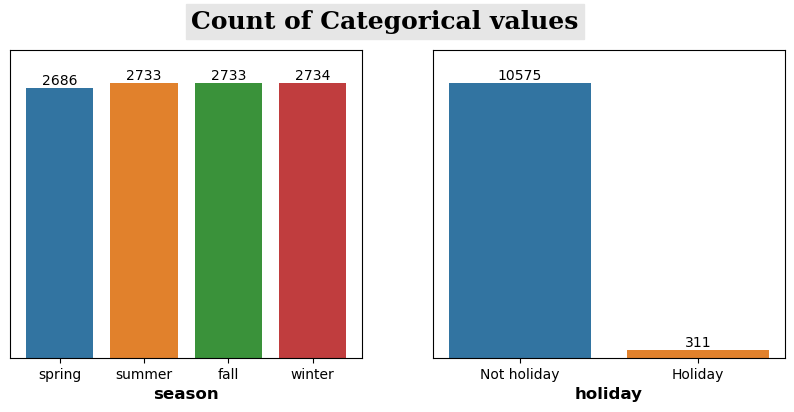

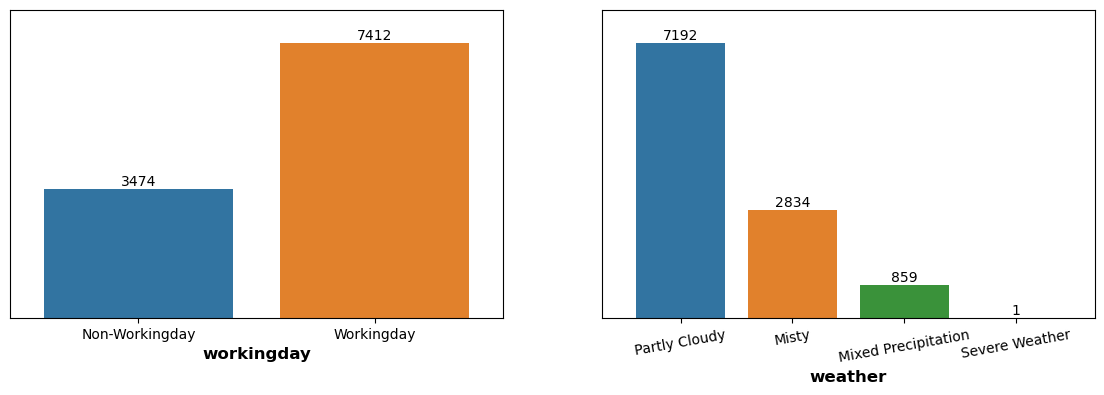

In [ ]:
# Univariate Graph of Categorical values showing Counts
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
fig.suptitle("Count of Categorical values",fontsize=18,weight='heavy',backgroundcolor='0.9',family='serif')
lst1 = ['season','holiday']
for i,cols in zip(range(2),lst1):
    sns.countplot(data=df,x=cols,ax=ax[i])
    ax[i].set_ylabel("")
    ax[i].set_xlabel(cols,weight='bold',fontsize=12)
    ax[i].set_yticks([])
    ax[i].margins(x = 0.05,y = 0.12)
    for bar in ax[i].containers:
        ax[i].bar_label(bar,weight='light',fontsize=10)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(14,4))
lst2 = ['workingday','weather']
for i,cols in zip(range(2),lst2):
    sns.countplot(data=df,x=cols,ax=ax[i])
    ax[i].set_ylabel("")
    ax[i].set_xlabel(cols,weight='bold',fontsize=12)
    ax[i].set_yticks([])
    plt.xticks(rotation=10)
    ax[i].margins(x = 0.08,y = 0.12)
    for bar in ax[i].containers:
        ax[i].bar_label(bar,weight='light',fontsize=10)

* Nearly Equal number of data points present for the season attributes
* Holiday has less number of data points comparing to it's counterpart
* Working day has more number of data points
* Partly cloudy has highest number of data points, then comes the Misty followed by Mixed Precipitation and lastly Severe Weather which has just one data point, which we will ignore at the later part of this analysis

In [ ]:
# droping Severe Weather from weather attribute
df = df.drop(df[df['weather']=='Severe Weather'].index)

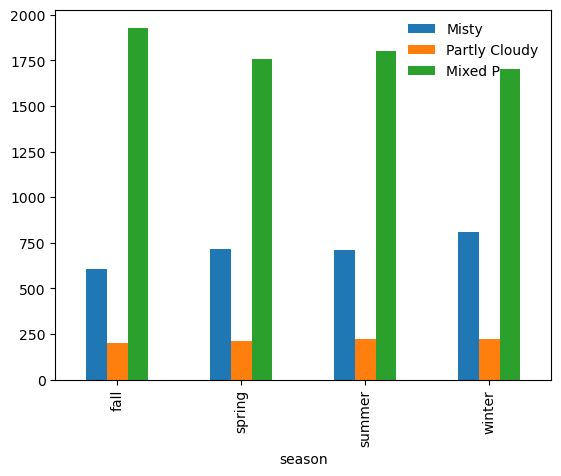

In [ ]:
pd.crosstab(df['season'],df['weather']).plot(kind='bar')
plt.legend(["Misty","Partly Cloudy","Mixed P"],frameon=False)
plt.show()

*It seems there is **no clear relation between Weather and Season***

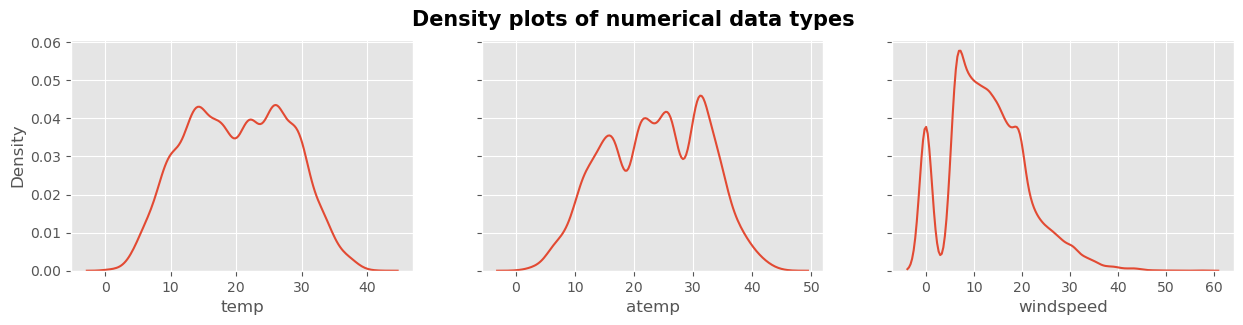

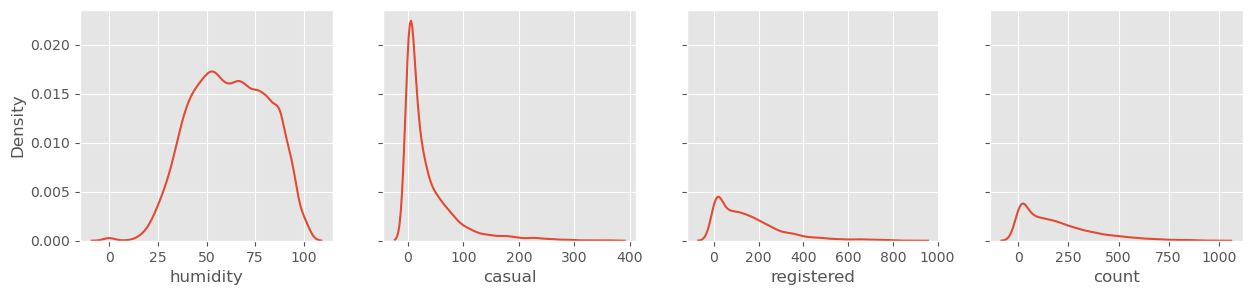

In [ ]:
# Density plots of numerical values
with plt.style.context('ggplot'):

    flt = df.select_dtypes(include=['float64']).columns
    shape = len(flt)
    fig,ax = plt.subplots(nrows=1,ncols=shape,figsize=(15,3),sharey=True)
    fig.suptitle("Density plots of numerical data types",fontsize=15,weight='heavy')
    for i,cols in zip(range(shape),flt):
        sns.kdeplot(data=df,x=cols,ax = ax[i])

    flt = df.select_dtypes(include=['int64']).columns
    shape = len(flt)
    fig,ax = plt.subplots(nrows=1,ncols=shape,figsize=(15,3),sharey=True)
    for i,cols in zip(range(shape),flt):
        sns.kdeplot(data=df,x=cols,ax = ax[i])

* From the above kdeplots, we can easily say that data points which we have, does not follow the gaussian distribution. Also few attributes like windspeed, casual, registered and count are highly skewed at right side

_____

## Finding Outliers

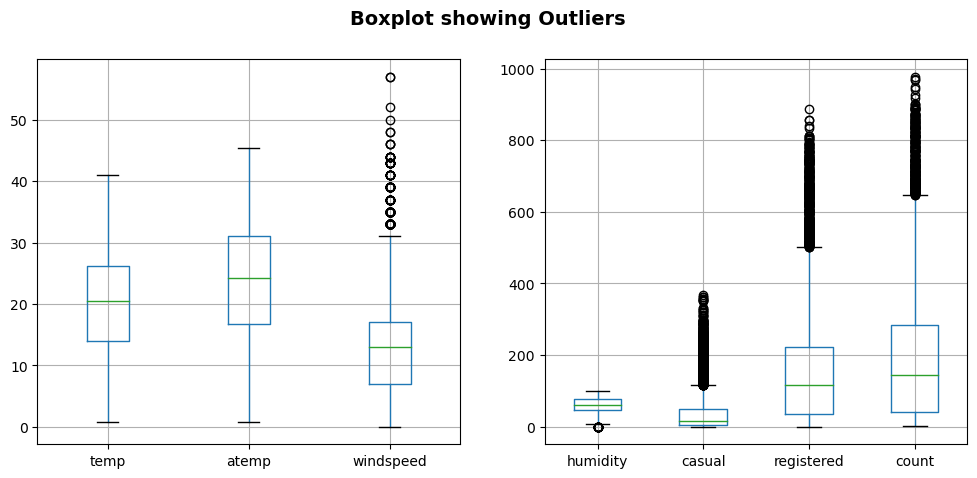

In [ ]:
# outliers
ints = df.select_dtypes(include=['int64'])
floats = df.select_dtypes(include=['float64'])

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
floats = df.select_dtypes(include=['float64'])
floats.boxplot(column=floats.columns.to_list(),ax=ax[0])
ints.boxplot(column=ints.columns.to_list(),ax=ax[1])
fig.suptitle("Boxplot showing Outliers",fontsize=14,weight='heavy')
plt.show()

* Most of the outliers are present in windspeed, causal, registered and count attributes, if we perform the analysis without treating these outliers our result will be highly distored.
* From many outliers treatment methods, **Inter Quartile Range(IQR)** method is generally used to come out of this problem

In [ ]:
___
___
___
___


''

In [ ]:
dk = df.copy()

In [ ]:
def remove_outlier(df, x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    # print((lower-df[x].mean())/df[x].std())
    # print((upper-df[x].mean())/df[x].std())
    # print(df.shape, x, lower, upper)
    return df[(df[x] > lower) & (df[x] < upper)]

In [ ]:
for i in dk[['humidity', 'windspeed', 'count']].columns:

    # print(i)
    dk = remove_outlier(dk, i)
    print(dk.shape)

(10863, 12)
(10637, 12)
(10351, 12)


In [ ]:
stats.chi2_contingency(pd.crosstab(dk['season'],dk['weather']))

Chi2ContingencyResult(statistic=47.34127472280649, pvalue=1.5996188650675265e-08, dof=6, expected_freq=array([[ 685.95633272,  200.03922326, 1712.00444402],
       [ 667.73809294,  194.72640325, 1666.53550382],
       [ 680.93971597,  198.57627282, 1699.48401121],
       [ 698.36585837,  203.65810067, 1742.97604096]]))

___
________
___
__

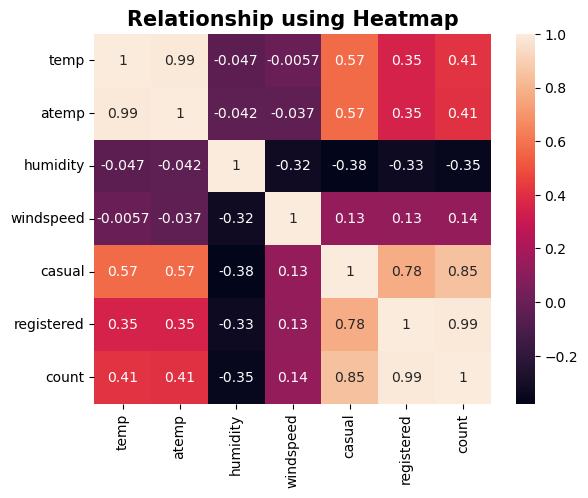

In [ ]:
# Showing relationship using heatmap
sns.heatmap(df.corr(method='spearman',numeric_only=True),annot =True)
plt.title("Relationship using Heatmap",fontsize=15,weight='heavy')
plt.show()

## Bivariate Analysis

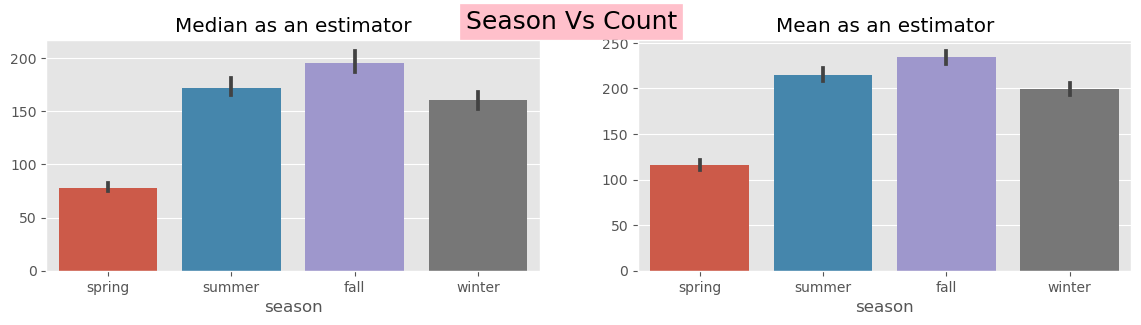

In [ ]:
# barplot showing relation between season and count attributes
with plt.style.context('ggplot'):

    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,3))
    fig.suptitle("Season Vs Count",fontsize=18,backgroundcolor='pink')

    sns.barplot(data=df,x='season',y='count',estimator='median',ax=ax[0])   # When we take median of all these values
    ax[0].set_title('Median as an estimator')
    ax[0].set_ylabel("")

    sns.barplot(data=df,x='season',y='count',estimator='mean',ax=ax[1])     # On taking mean of the different values in season attributes
    ax[1].set_title('Mean as an estimator')
    ax[1].set_ylabel("")

    plt.show()

* Mean and Median is used in the above graph to get the clear picture of the dataset
* It is clear that more number of cycles rented during fall season followed by summer and then winter and lastly spring
* **fall > summer > winter > spring**

____

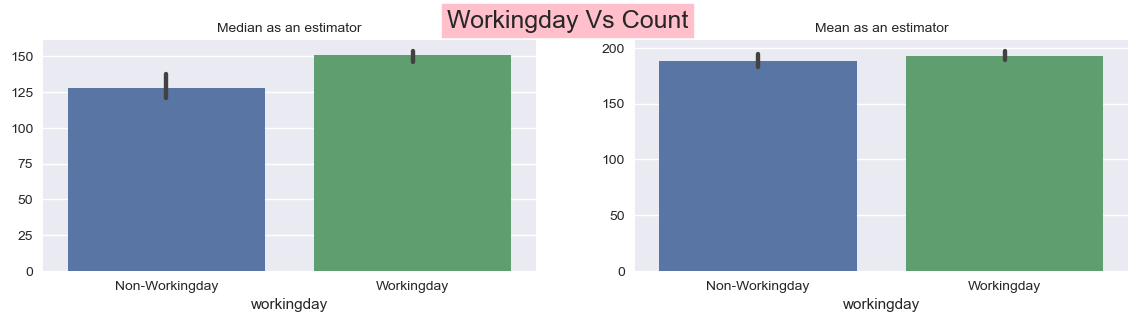

In [ ]:
# barplot showing relation between Workingday and count attributes
with plt.style.context('seaborn'):

    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,3))
    fig.suptitle("Workingday Vs Count",fontsize=18,backgroundcolor='pink')

    sns.barplot(data=df,x='workingday',y='count',estimator='median',ax=ax[0])   # When we take median of all these values
    ax[0].set_title('Median as an estimator',fontsize=10)
    ax[0].set_ylabel("")

    sns.barplot(data=df,x='workingday',y='count',estimator='mean',ax=ax[1])     # On taking mean of the different values in season attributes
    ax[1].set_title('Mean as an estimator',fontsize=10)
    ax[1].set_ylabel("")

    plt.show()

* Just like the previous graph both mean and median is taken to get the clear picture
* In mean graph, it seems that both working day and non-working day has same number of rented cycles, but if we go to median graph, it's clear that Workingday has more number of rented cycles than Non-Workingday
* **Workingday > Non-Workingday**

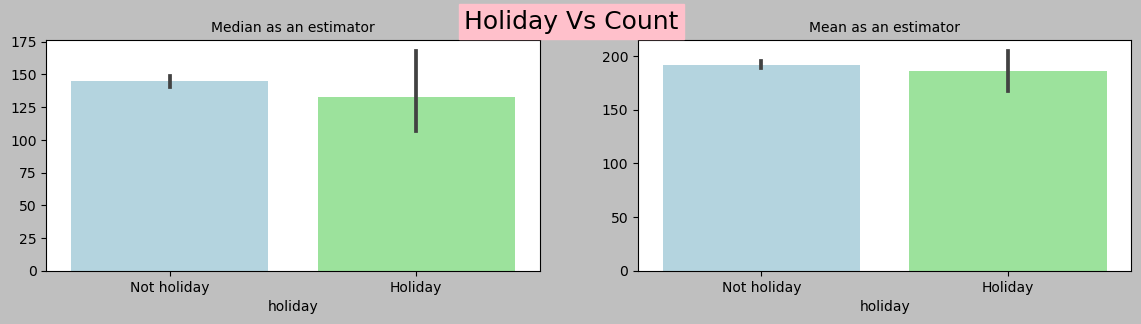

In [ ]:
# barplot showing relation between Workingday and count attributes
with plt.style.context('grayscale'):

    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,3))
    fig.suptitle("Holiday Vs Count",fontsize=18,backgroundcolor='pink')

    sns.barplot(data=df,x='holiday',y='count',estimator='median',ax=ax[0],palette=['lightblue','lightgreen'])   # When we take median of all these values
    ax[0].set_title('Median as an estimator',fontsize=10)
    ax[0].set_ylabel("")

    sns.barplot(data=df,x='holiday',y='count',estimator='mean',ax=ax[1],palette=['lightblue','lightgreen'])     # On taking mean of the different values in season attributes
    ax[1].set_title('Mean as an estimator',fontsize=10)
    ax[1].set_ylabel("")

    plt.show()

* Not holiday has more number of cycles rented comparing to holidays
* **Not Holiday > Holiday**

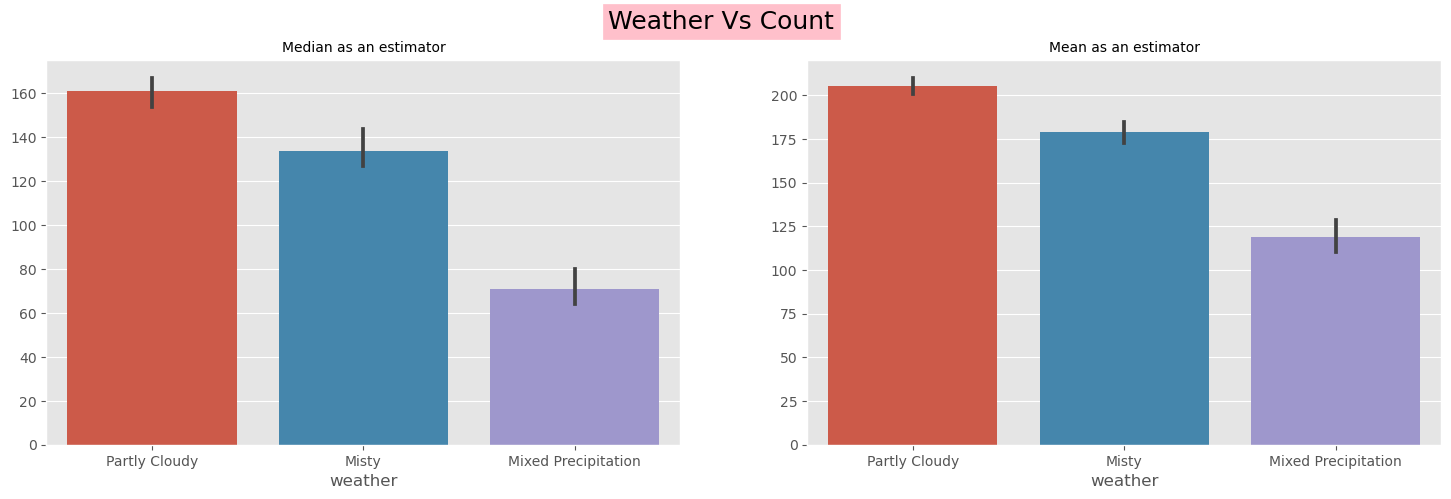

In [ ]:
# barplot showing relation between Workingday and count attributes
with plt.style.context('ggplot'):

    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,5))
    fig.suptitle("Weather Vs Count",fontsize=18,backgroundcolor='pink')
    sns.barplot(data=df,x='weather',y='count',estimator='median',ax=ax[0])   # When we take median of all these values
    ax[0].set_title('Median as an estimator',fontsize=10)
    ax[0].set_ylabel("")

    sns.barplot(data=df,x='weather',y='count',estimator='mean',ax=ax[1])     # On taking mean of the different values in season attributes
    ax[1].set_title('Mean as an estimator',fontsize=10)
    ax[1].set_ylabel("")

    plt.show()

* On Partly Cloudy day more number of cycles rented followed by Misty weather and then Mixed Precipitaion
* **Partly Cloudy > Misty Weather > Mixed Precipation**

____

## Hypothesis Testing

For all the following test, i'll consider **significance value as 0.05**

### Working Day has effect on number of electric cycles rented

Tests whether the means of two independent samples are significantly different.

**Assumptions**

* Observation in each sample are independent and identically distributed
* Observation in each sample are normally distributed
* Observations in each sample have the same variance


In [ ]:
# filtering non_working and working groups
non_working = df[df['workingday'] == 'Non-Workingday']['count']
working = df[df['workingday'] == 'Workingday']['count']

**Testing the Normality Assumption for t-test**

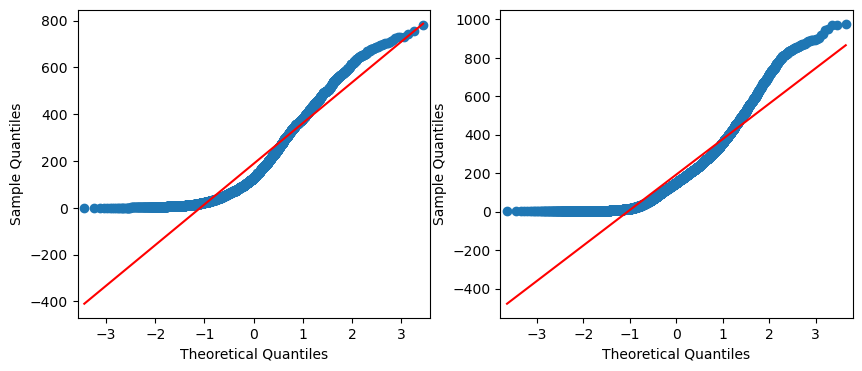

In [ ]:
# Observation in each sample are normally distributed or the distribution is Gaussian
# We can check the above assumption using qqplot and shapiro test
fig,ax = plt.subplots(1,2,figsize=(10,4))
qqplot(non_working,line='s',ax=ax[0])
qqplot(working,line='s',ax=ax[1])

plt.show()

Since the the data points are not clearly following the red line, we can easily say that data is hight skewed and it is not normal/Gaussian, which can also be verifed using the shapiro test below

In [ ]:
# Ho: Data is Gaussian
# Ha: Data is not Gaussian
samp = df.sample(50,random_state=2600)
stat, p_value1 = stats.shapiro(non_working)
stat, p_value2 = stats.shapiro(working)

if p_value1 <= 0.05:
    print(f"The p_value1 and p_value2 is {p_value1,p_value2}")
    print("Reject the null hypothesis")
    print("This means Data is Not Gaussian in nature")
else:
    print(f"The p_value1 and p_value2 is {p_value1,p_value2}")
    print("Failed to reject the null hypothesis")
    print("Data is Gaussian")

The p_value1 and p_value2 is (4.203895392974451e-45, 0.0)
Reject the null hypothesis
This means Data is Not Gaussian in nature


**Testing the variance of the dataset using levene test**

*Ho*: The variance of both the group is equal

*Ha*: The variance of both the group is different


In [ ]:
# using levene test to check variance between the group
non_working = df[df['workingday'] == 'Non-Workingday']['count']
working = df[df['workingday'] == 'Workingday']['count']

_, p_value = stats.levene(non_working,working)
if p_value < 0.05:
    print(f"p-value is {p_value}")
    print("Variance is not equal")
else:
    print(f"p-value is {p_value}")
    print("Variance is equal in both the group")

p-value is 0.9489054295190451
Variance is equal in both the group


### t-test
* **Ho**: The working day has no effect on number of electric cycles rented
* **Ha**: The working day has effect on number of electric cycles rented

In [ ]:
# working day has an effect on the number of electric cycles ( 2 sample T-test)
non_working = df[df['workingday'] == 'Non-Workingday']['count']
working = df[df['workingday'] == 'Workingday']['count']
statistic, p_value = stats.ttest_ind(non_working,working)
if p_value < 0.05:
    print(f"The p-value is {p_value}\nstatistic value: {statistic}")
    print("Reject the null hypothesis")
    print("The working day has effect on number of electric cycles rented")
else:
    print(f"The p-value is {p_value}\nstatistic value: {statistic}")
    print("Failed to reject the null hypothesis")
    print("The working day has no effect on number of electric cycles rented")

The p-value is 0.22607559007082925
statistic value: -1.2105985511265596
Failed to reject the null hypothesis
The working day has no effect on number of electric cycles rented


* Earlier from the graph we figured out that cycles reneted on **Workingday > Non-Workingday**
* But here with given dataset which we have, we can clearly see that it is not the case, So we can finally see that the above result by graph is just by chance.
* **The working day has no effect on number of electric cycles rented**

___
___

### No. of cycles rented similar or different in different weather
Since the weather have more than 2 groups, here ANOVA test need to be performed for the hypothesis testing

**Assumptions**

* Observation in each sample are independent and identically distributed
* Observation in each sample are normally distributed
* Observations in each sample have the same variance

For this question we are taking confidence interval as 95%

**For checking whether data is gaussian or not we will use qqplot**

In [ ]:
# filtering the group values
p_cloudy = df[df['weather']=="Partly Cloudy"]['count']
misty = df[df['weather']=="Misty"]['count']
mixed_p = df[df['weather']=="Mixed Precipitation"]['count']
s_weather = df[df['weather']=="Severe Weather"]['count']

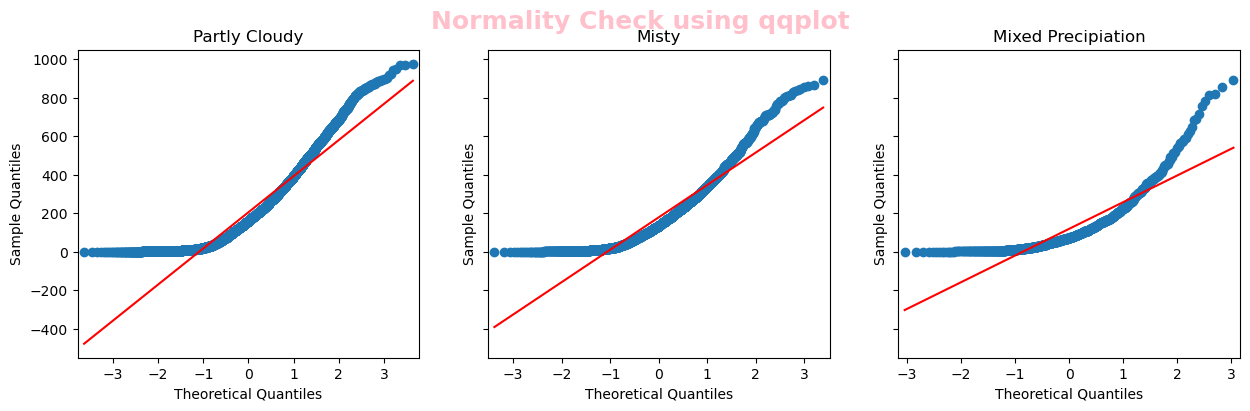

In [ ]:
# qqplot
fig,ax = plt.subplots(1,3,figsize=(15,4), sharey=True)
fig.suptitle("Normality Check using qqplot",fontsize=18,weight='heavy',color='pink')
qqplot(p_cloudy,line='s',ax=ax[0])
ax[0].set_title('Partly Cloudy')
qqplot(misty,line='s',ax=ax[1])
ax[1].set_title('Misty')
qqplot(mixed_p,line='s',ax=ax[2])
ax[2].set_title('Mixed Precipiation')

plt.show()

From above qqplots it's quite visible that all the data points are way different from Gaussian

*Since Severe whether has only one value, we can ignore that value for our analysis*

Now let's check the variance of these dataset using **levene test**

In [ ]:
# checking variance using levene test
# Ho: The variance are equal
# Ha: The variance are different

_, p_value = stats.levene(p_cloudy,misty,mixed_p)
if p_value < 0.05:
    print(f"The p_value is {p_value}")
    print("Reject the null hypothesis")
    print("The variance are different")
else:
    print(f"The p_value is {p_value}")
    print("Failed to reject the null hypothesis")
    print("The variance are same")

The p_value is 6.198278710731511e-36
Reject the null hypothesis
The variance are different


Since **both the assumptions failed** here, we will **go for kruskal test**, but for sake of curiosity I will also do the anova test

**Ho**: The number of cycles rented are similar in different weather

**H1**: The number of cycles rented are different in different weather

____

**Kruskal test**

In [ ]:
# kruskal test
stat, p = stats.kruskal(p_cloudy,misty,mixed_p)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('The number of cycles rented are similar in different weather')
else:
 print('The number of cycles rented are different in different weather')

stat=204.956, p=0.000
The number of cycles rented are different in different weather


**ANOVA**

In [ ]:
# using Anova f_oneway to test the hypothesis
statistic,p_value = stats.f_oneway(p_cloudy,misty,mixed_p)
if p_value < 0.05:
    print(f"p_value : {p_value}\nstatistic value: {statistic}")
    print("Reject the null hypothesis")
    print("The number of cycles rented are different in different weather")
else:
    print(f"p_value : {p_value}\nstatistic value: {statistic}")
    print("Failed to Reject the null hypothesis")
    print("The number of cycles rented are similar in different weather")

p_value : 4.976448509904196e-43
statistic value: 98.28356881946706
Reject the null hypothesis
The number of cycles rented are different in different weather


Since the value is very close to 0, we will reject the null hypothesis, which implies that:

**The number of cycles rented are different in different weather** which is similar to what we saw from our graph, where **Partly Cloudy > Misty Weather > Mixed Precipation**

___

## No. of cycles rented similar or different in different season

In [ ]:
winter = df[df['season']=='winter']['count']
summer = df[df['season']=='summer']['count']
fall = df[df['season']=='fall']['count']
spring = df[df['season']=='spring']['count']

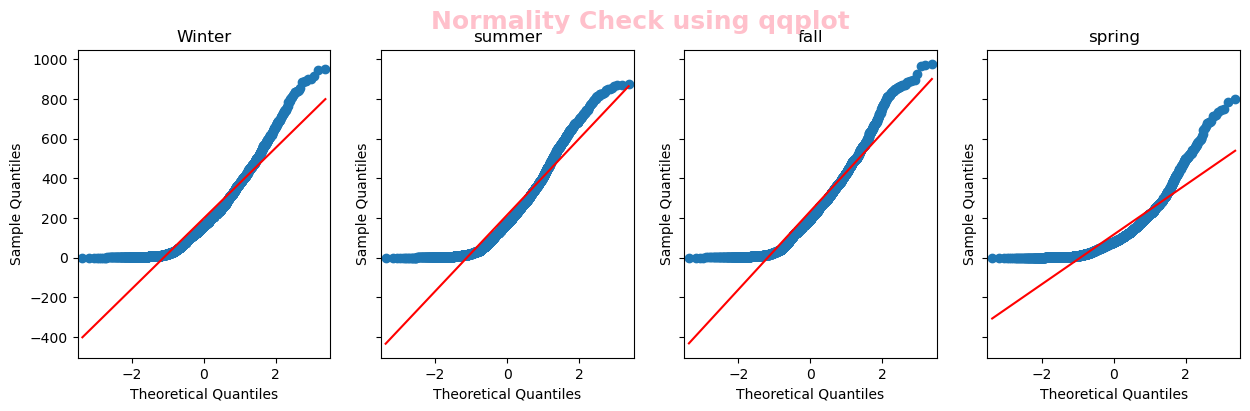

In [ ]:
fig,ax = plt.subplots(1,4,figsize=(15,4), sharey=True)
fig.suptitle("Normality Check using qqplot",fontsize=18,weight='heavy',color='pink')
qqplot(winter,line='s',ax=ax[0])
ax[0].set_title('Winter')
qqplot(summer,line='s',ax=ax[1])
ax[1].set_title('summer')
qqplot(fall,line='s',ax=ax[2])
ax[2].set_title('fall')
qqplot(spring,line='s',ax=ax[3])
ax[3].set_title('spring')
plt.show()

From above plots it's clear that all the data sets are not normal, so we are going to use **kruskal test** but for sake of completeness, let's also perform levene test to check the variance

In [ ]:
# checking variance using levene test
# Ho: The variance are equal
# Ha: The variance are different

_, p_value = stats.levene(winter,summer,fall,spring)
if p_value < 0.05:
    print(f"The p_value is {p_value}")
    print("Reject the null hypothesis")
    print("The variance are different")
else:
    print(f"The p_value is {p_value}")
    print("Failed to reject the null hypothesis")
    print("The variance are same")

The p_value is 1.1170990373788981e-118
Reject the null hypothesis
The variance are different


**Kruskal test**

**Ho**: The number of cycles rented are similar in different seasons

**Ha**: The number of cycles rented are different in different seasons

In [ ]:
# kruskal test
stat, p = stats.kruskal(winter,summer,fall,spring)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('The number of cycles rented are similar in different season')
else:
 print('The number of cycles rented are different in different season')

stat=699.882, p=0.000
The number of cycles rented are different in different season


In [ ]:
# using Anova f_oneway to test the hypothesis
statistic,p_value = stats.f_oneway(winter,summer,fall,spring)
if p_value < 0.05:
    print(f"p_value : {p_value}\nstatistic value: {statistic}")
    print("Reject the null hypothesis")
    print("The number of cycles rented are different in different season")
else:
    print(f"p_value : {p_value}\nstatistic value: {statistic}")
    print("Failed to Reject the null hypothesis")
    print("The number of cycles rented are similar in different season")

p_value : 6.204069471997093e-149
statistic value: 236.94289498936618
Reject the null hypothesis
The number of cycles rented are different in different season


* **The number of cycles rented are different in different season**
* This is similar to what we got from the graph where **fall > summer > winter > spring**


____
____

### Weather is dependent on season
Since for this test, we have two categorical values, we will perform Chi-Squared Test

**Assumptions**

* Observations used in the calculation of the contingency table are independent
* 25 or more examples in each cell of the contingency table

**Chi-Squared test**

**Ho**: Weather is independent on season

**Ha**: Weather is dependent on season

In [ ]:
# taking sample of 50 from both categorical values
season = df.sample(50,replace=True,random_state=2400).season
weather = df.sample(50,replace=True,random_state=2400).weather

In [ ]:
# using chi2_contingency
statistic, p_value, _,_ = stats.chi2_contingency(pd.crosstab(season,weather))
if p_value < 0.05:
    print(f"p_value: {p_value}\nstatistic value: {statistic}")
    print("Reject the null hypothesis")
    print("Weather is dependent on season")
else:
    print(f"p_value: {p_value}\nstatistic value: {statistic}")
    print("Failed to Reject the null hypothesis")
    print("Weather is independent on season")

p_value: 0.8264052457515734
statistic value: 2.8583391398517444
Failed to Reject the null hypothesis
Weather is independent on season


* It's clear that **Weather is independent on Season**, which we also saw using the graph earlier.

____
____

# Insights

* The number of cycles rented does not depend whether it is working day or holiday/Non-workingday, it is possible nearly equal number of chances of customers renting cycles on each day
* Weather plays a crucial role on the number of cycles rented on a particular day, More number of Cycles will be rented during Cloudy weather, whereas it would be opposite during Rain or severe weather condition
* **Partly Cloudy > Misty Weather > Mixed Precipation** this is the order of number of cylces rented during a particular weather condition
* The number of cycles rented very much depends on the season of the year, the order of cycles rented in a given season can be seen below
*  **fall > summer > winter > spring**
* Weather is independent on Season

____
____
_____